# GEO3463: CTD data processing code for SAMS field trip (Pre-cruise example)
This Jupyter program is used to read and plot the CTD data, including, 
1. CTD profile data
2. CTD bottle data

Variables and definations in CTD
- Scan: Scan Count [dimensionless]
- DepSM: Depth [m]
- prDM: Pressure, Digiquartz [db]
- Tv290C: Temperature [deg C]
- C0mS/cm: Conductivity [mS/cm]
- FlECO-AFL: fluorescence [mg/m3] 
- Par/sat/log: PAR [uE/m2/s] 
- Sbeox0Mm/L: Oxygen [umol/L]
- Sbeox0PS: O2 saturation [%] 
- DepSM2: Depth [m]
- Sal00: Salinity [PSU]
- Sigma-t00: Density [kg/m3]
- SvCM: Sound Velocity [m/s]

### Load function needed for the program

In [1]:
import pandas as pd
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

### Supress warnings (prevents Jupyter printing out warnings....do be careful with this)

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Define column names of CTD and bottle file

In [3]:
# define column names manually，since column headers of PAR and Fluorescence of the ascii file are printed without spacing, which confuses the read function
column_name_profile = ['Scan','DD','MMM','YYYY','HH:MM:SS','DepSM','PrdM','Tv290C','C0mS/cm','FlECO-AFL','Par/sat/log','Sbeox0Mm/L','Sbeox0PS','DepSM2','Sal00','Sigma-t00','SvCM','Flag']
column_name_bottle = ['Bottle','Date','Sal00','Sigma-t00','Scan','TimeJ','DepSM','Tv290C','C0mS/cm','FlECO-AFL','Par/sat/log','Sbeox0Mm/L','Note']

### Read in the CTD data

In [4]:
# read profile data
file_name_profile = 're9_1m.asc'
data_profile = pd.read_fwf(file_name_profile, 
                           header=None, 
                           skiprows=1, 
                           names=column_name_profile, 
                           index_col='DepSM',
                           parse_dates={'Time':['YYYY','MMM','DD','HH:MM:SS']})

# the CTD file contains both upcast and downcast
# to read/plot data individually, seperate two casts by adding a column, titled 'cast_diff'
data_profile['cast_diff'] = data_profile['DepSM2'].diff()
data_profile['cast_diff'][0] = 1

### Read in the Bottle data

In [5]:
# read bottle data
file_name_bottle = 're9.btl'
data_bottle = pd.read_fwf(file_name_bottle, 
                          header=None, 
                          skiprows=162,
                          names=column_name_bottle,
                          encoding='latin-1')


# select the average and std
data_bottle_average = data_bottle[data_bottle['Note']=='(avg)'].reset_index(drop=True)
data_bottle_std = data_bottle[data_bottle['Note']=='(sdev)'].reset_index(drop=True)

### Plot CTD data

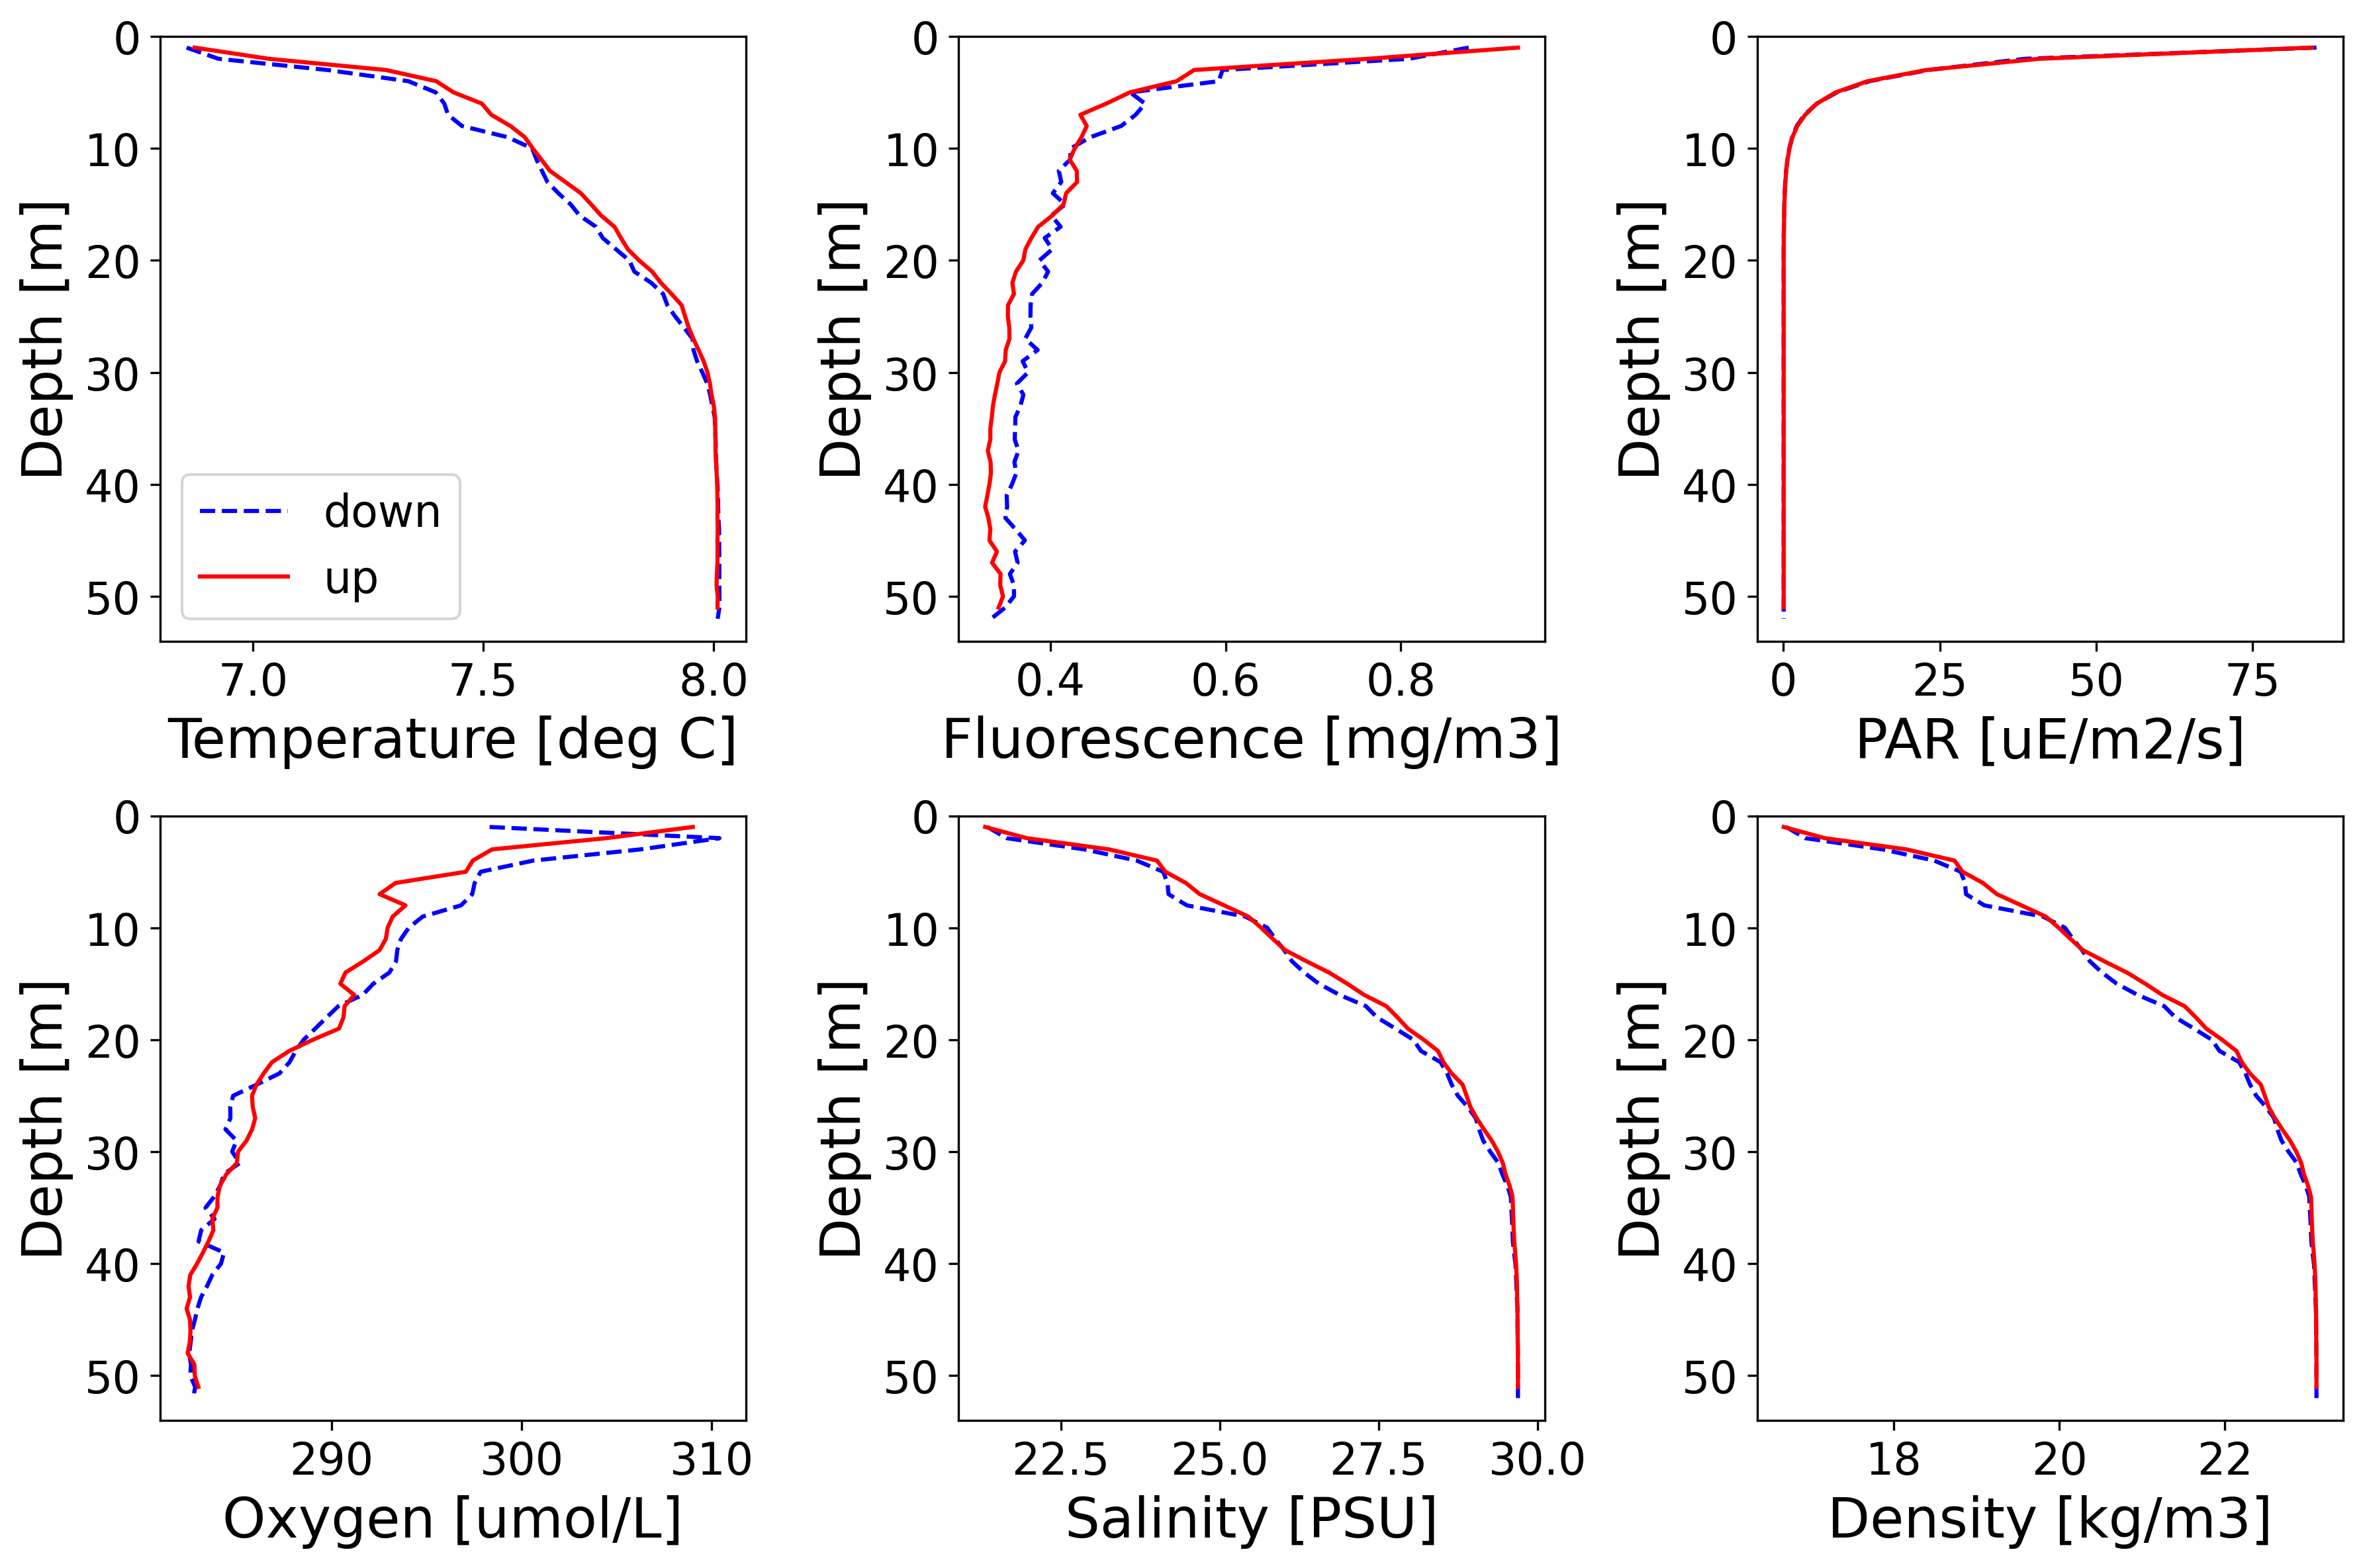

In [6]:
# plot profile
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8),dpi=300)

# temperature
axes[0,0].plot(data_profile[(data_profile['cast_diff']==1)]['Tv290C'],data_profile[(data_profile['cast_diff']==1)]['DepSM2'],'b--', label='down')
axes[0,0].plot(data_profile[(data_profile['cast_diff']==-1)]['Tv290C'],data_profile[(data_profile['cast_diff']==-1)]['DepSM2'],'r-', label='up')
axes[0,0].set_ylim([0,np.max(data_profile['DepSM2'])+2])
axes[0,0].invert_yaxis()
axes[0,0].set_xlabel('Temperature [deg C]', fontsize = 20)
axes[0,0].set_ylabel('Depth [m]', fontsize = 20)
axes[0,0].xaxis.set_tick_params(labelsize=16)
axes[0,0].yaxis.set_tick_params(labelsize=16)
axes[0,0].legend(fontsize = 16)   

# fluorescence
axes[0,1].plot(data_profile[(data_profile['cast_diff']==1)]['FlECO-AFL'],data_profile[(data_profile['cast_diff']==1)]['DepSM2'],'b--', label='down')
axes[0,1].plot(data_profile[(data_profile['cast_diff']==-1)]['FlECO-AFL'],data_profile[(data_profile['cast_diff']==-1)]['DepSM2'],'r-', label='up')
axes[0,1].set_ylim([0,np.max(data_profile['DepSM2'])+2])
axes[0,1].invert_yaxis()
axes[0,1].set_xlabel('Fluorescence [mg/m3]', fontsize = 20)
axes[0,1].set_ylabel('Depth [m]', fontsize = 20)
axes[0,1].xaxis.set_tick_params(labelsize=16)
axes[0,1].yaxis.set_tick_params(labelsize=16)
# axes[0,1].legend(fontsize = 16)   

# PAR
axes[0,2].plot(data_profile[(data_profile['cast_diff']==1)]['Par/sat/log'],data_profile[(data_profile['cast_diff']==1)]['DepSM2'],'b--', label='down')
axes[0,2].plot(data_profile[(data_profile['cast_diff']==-1)]['Par/sat/log'],data_profile[(data_profile['cast_diff']==-1)]['DepSM2'],'r-', label='up')
axes[0,2].set_ylim([0,np.max(data_profile['DepSM2'])+2])
axes[0,2].invert_yaxis()
axes[0,2].set_xlabel('PAR [uE/m2/s]', fontsize = 20)
axes[0,2].set_ylabel('Depth [m]', fontsize = 20)
axes[0,2].xaxis.set_tick_params(labelsize=16)
axes[0,2].yaxis.set_tick_params(labelsize=16)
# axes[0,2].legend(fontsize = 16)   

# Oxygen
axes[1,0].plot(data_profile[(data_profile['cast_diff']==1)]['Sbeox0Mm/L'],data_profile[(data_profile['cast_diff']==1)]['DepSM2'],'b--', label='down')
axes[1,0].plot(data_profile[(data_profile['cast_diff']==-1)]['Sbeox0Mm/L'],data_profile[(data_profile['cast_diff']==-1)]['DepSM2'],'r-', label='up')
axes[1,0].set_ylim([0,np.max(data_profile['DepSM2'])+2])
axes[1,0].invert_yaxis()
axes[1,0].set_xlabel('Oxygen [umol/L]', fontsize = 20)
axes[1,0].set_ylabel('Depth [m]', fontsize = 20)
axes[1,0].xaxis.set_tick_params(labelsize=16)
axes[1,0].yaxis.set_tick_params(labelsize=16)
# axes[1,0].legend(fontsize = 16)    

# Salinity
axes[1,1].plot(data_profile[(data_profile['cast_diff']==1)]['Sal00'],data_profile[(data_profile['cast_diff']==1)]['DepSM2'],'b--', label='down')
axes[1,1].plot(data_profile[(data_profile['cast_diff']==-1)]['Sal00'],data_profile[(data_profile['cast_diff']==-1)]['DepSM2'],'r-', label='up')
axes[1,1].set_ylim([0,np.max(data_profile['DepSM2'])+2])
axes[1,1].invert_yaxis()
axes[1,1].set_xlabel('Salinity [PSU]', fontsize = 20)
axes[1,1].set_ylabel('Depth [m]', fontsize = 20)
axes[1,1].xaxis.set_tick_params(labelsize=16)
axes[1,1].yaxis.set_tick_params(labelsize=16)
# axes[1,1].legend(fontsize = 16)    

# Density 
axes[1,2].plot(data_profile[(data_profile['cast_diff']==1)]['Sigma-t00'],data_profile[(data_profile['cast_diff']==1)]['DepSM2'],'b--', label='down')
axes[1,2].plot(data_profile[(data_profile['cast_diff']==-1)]['Sigma-t00'],data_profile[(data_profile['cast_diff']==-1)]['DepSM2'],'r-', label='up')
axes[1,2].set_ylim([0,np.max(data_profile['DepSM2'])+2])
axes[1,2].invert_yaxis()
axes[1,2].set_xlabel('Density [kg/m3]', fontsize = 20)
axes[1,2].set_ylabel('Depth [m]', fontsize = 20)
axes[1,2].xaxis.set_tick_params(labelsize=16)
axes[1,2].yaxis.set_tick_params(labelsize=16)
# axes[1,2].legend(fontsize = 16) 

fig.tight_layout()

### Plot bottle data

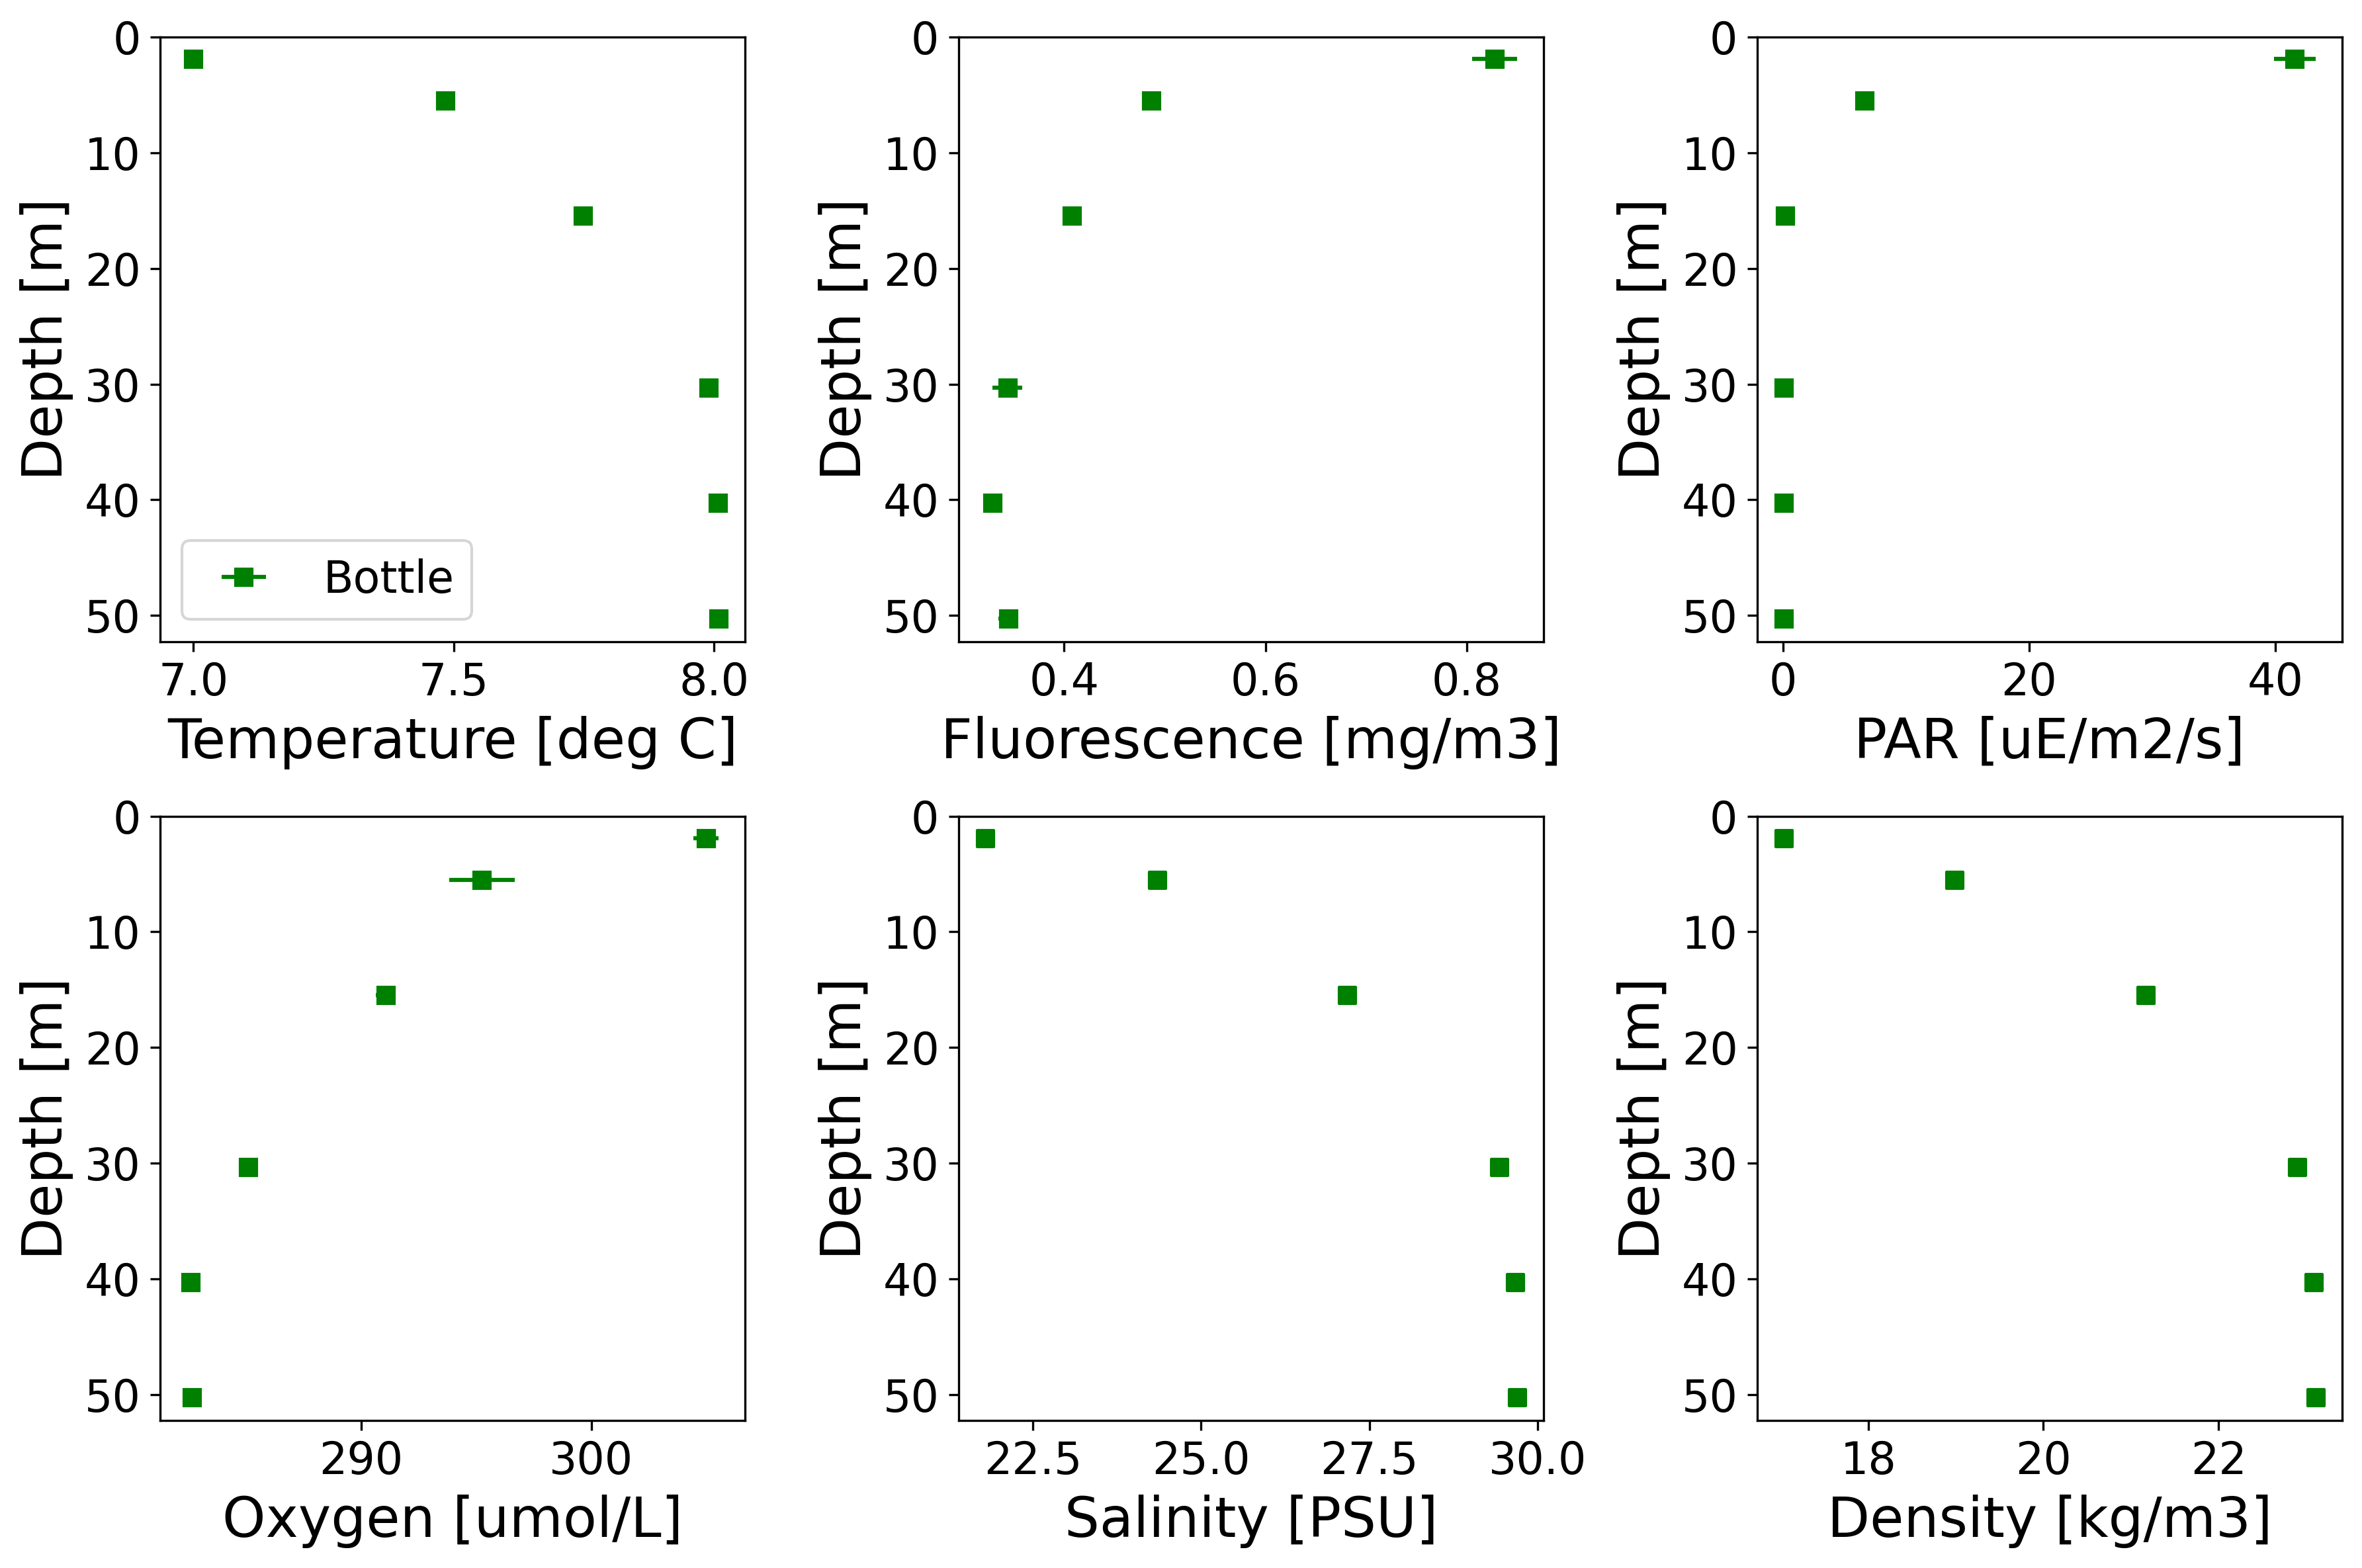

In [7]:
#% plot bottle
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8),dpi=300)

# temperature
axes[0,0].errorbar(data_bottle_average['Tv290C'],data_bottle_average['DepSM'],xerr=data_bottle_std['Tv290C'],marker='s',color='green',ls='None',label='Bottle')
axes[0,0].set_ylim([0,np.max(data_bottle_average['DepSM'])+2])
axes[0,0].invert_yaxis()
axes[0,0].set_xlabel('Temperature [deg C]', fontsize = 20)
axes[0,0].set_ylabel('Depth [m]', fontsize = 20)
axes[0,0].xaxis.set_tick_params(labelsize=16)
axes[0,0].yaxis.set_tick_params(labelsize=16)
axes[0,0].legend(fontsize = 16)   

# fluorescence
axes[0,1].errorbar(data_bottle_average['FlECO-AFL'],data_bottle_average['DepSM'],xerr=data_bottle_std['FlECO-AFL'],marker='s',color='green',ls='None',label='Bottle')
axes[0,1].set_ylim([0,np.max(data_bottle_average['DepSM'])+2])
axes[0,1].invert_yaxis()
axes[0,1].set_xlabel('Fluorescence [mg/m3]', fontsize = 20)
axes[0,1].set_ylabel('Depth [m]', fontsize = 20)
axes[0,1].xaxis.set_tick_params(labelsize=16)
axes[0,1].yaxis.set_tick_params(labelsize=16)
# axes[0,1].legend(fontsize = 16)   

# PAR
axes[0,2].errorbar(data_bottle_average['Par/sat/log'],data_bottle_average['DepSM'],xerr=data_bottle_std['Par/sat/log'],marker='s',color='green',ls='None',label='Bottle')
# axes[0,2].set_xlim([400,700])
axes[0,2].set_ylim([0,np.max(data_bottle_average['DepSM'])+2])
# axes[0,2].set_xscale('log')
axes[0,2].invert_yaxis()
axes[0,2].set_xlabel('PAR [uE/m2/s]', fontsize = 20)
axes[0,2].set_ylabel('Depth [m]', fontsize = 20)
axes[0,2].xaxis.set_tick_params(labelsize=16)
axes[0,2].yaxis.set_tick_params(labelsize=16)
# axes[0,2].legend(fontsize = 16)   

# Oxygen
axes[1,0].errorbar(data_bottle_average['Sbeox0Mm/L'],data_bottle_average['DepSM'],xerr=data_bottle_std['Sbeox0Mm/L'],marker='s',color='green',ls='None',label='Bottle')
axes[1,0].set_ylim([0,np.max(data_bottle_average['DepSM'])+2])
axes[1,0].invert_yaxis()
axes[1,0].set_xlabel('Oxygen [umol/L]', fontsize = 20)
axes[1,0].set_ylabel('Depth [m]', fontsize = 20)
axes[1,0].xaxis.set_tick_params(labelsize=16)
axes[1,0].yaxis.set_tick_params(labelsize=16)
# axes[1,0].legend(fontsize = 16)    

# Salinity
axes[1,1].scatter(data_bottle_average['Sal00'],data_bottle_average['DepSM'],marker='s',color='green',label='Bottle')
axes[1,1].set_ylim([0,np.max(data_bottle_average['DepSM'])+2])
axes[1,1].invert_yaxis()
axes[1,1].set_xlabel('Salinity [PSU]', fontsize = 20)
axes[1,1].set_ylabel('Depth [m]', fontsize = 20)
axes[1,1].xaxis.set_tick_params(labelsize=16)
axes[1,1].yaxis.set_tick_params(labelsize=16)
# axes[1,1].legend(fontsize = 16)    

# Density 
axes[1,2].scatter(data_bottle_average['Sigma-t00'],data_bottle_average['DepSM'],marker='s',color='green',label='Bottle')
axes[1,2].set_ylim([0,np.max(data_bottle_average['DepSM'])+2])
axes[1,2].invert_yaxis()
axes[1,2].set_xlabel('Density [kg/m3]', fontsize = 20)
axes[1,2].set_ylabel('Depth [m]', fontsize = 20)
axes[1,2].xaxis.set_tick_params(labelsize=16)
axes[1,2].yaxis.set_tick_params(labelsize=16)
# axes[1,2].legend(fontsize = 16) 

fig.tight_layout()

### Overlay bottle data onto CTD data

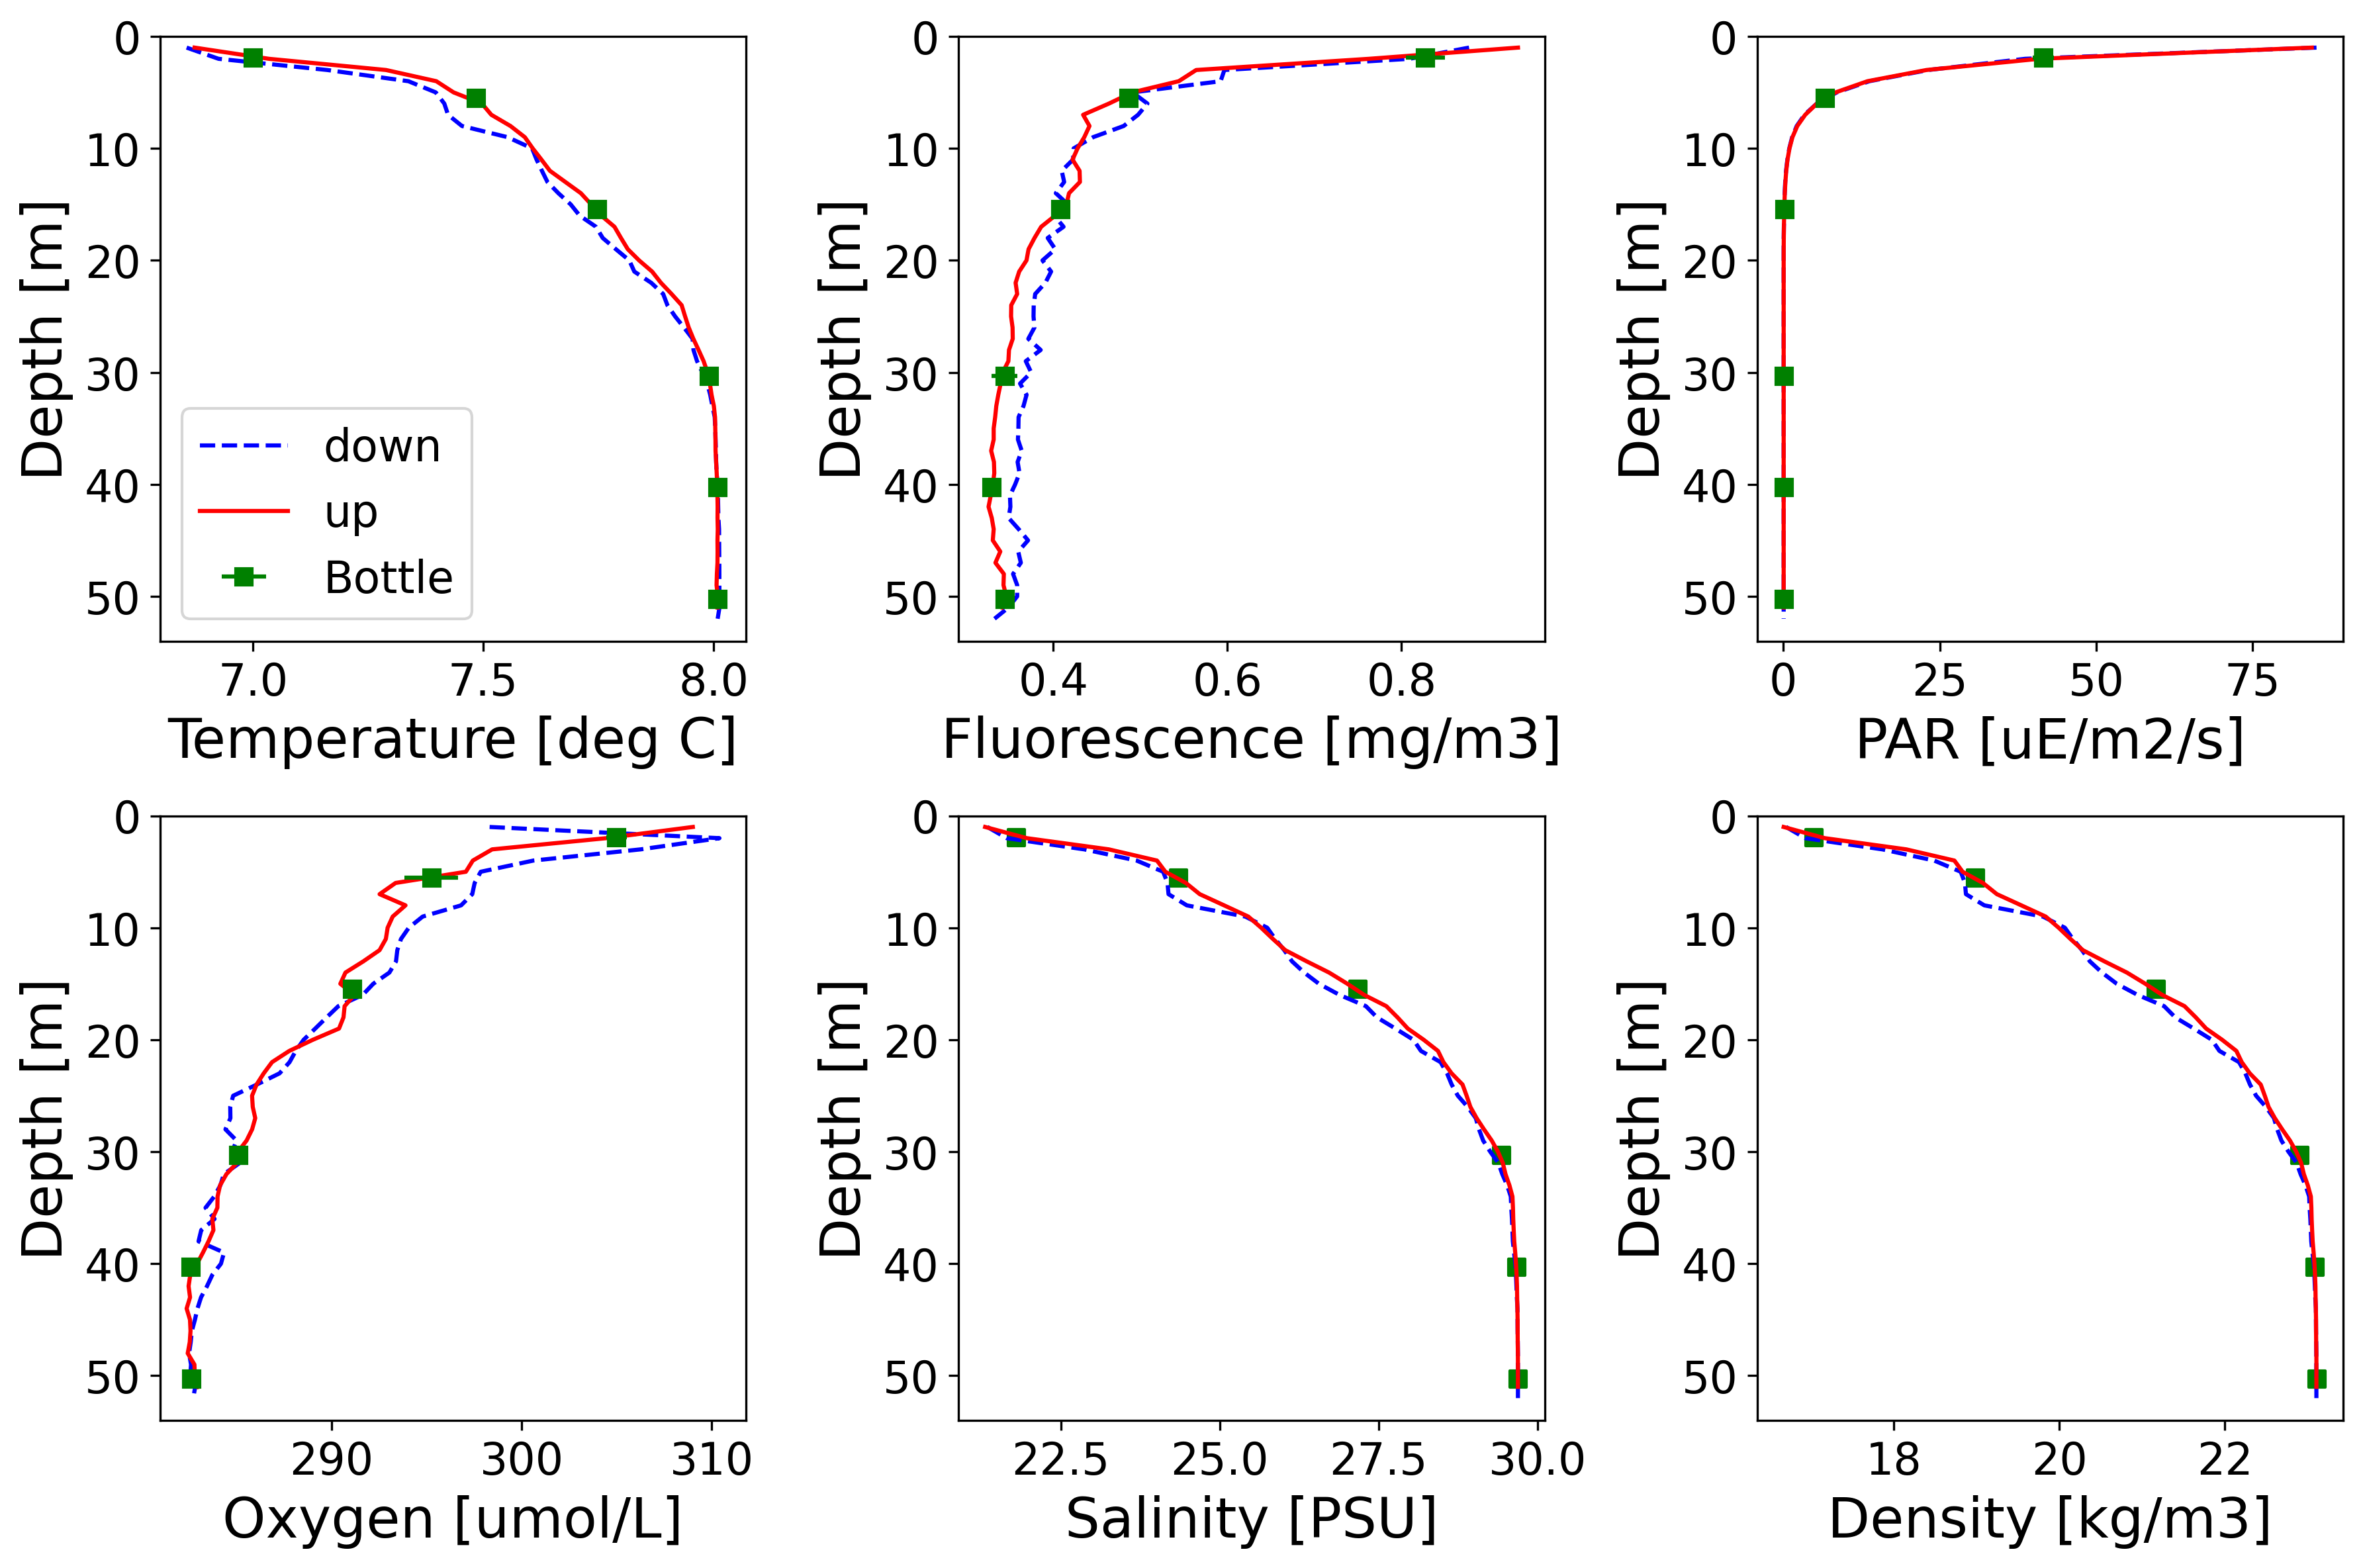

In [8]:
# plot both profile and bottle data
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8),dpi=300)

# temperature
axes[0,0].plot(data_profile[(data_profile['cast_diff']==1)]['Tv290C'],data_profile[(data_profile['cast_diff']==1)]['DepSM2'],'b--', label='down')
axes[0,0].plot(data_profile[(data_profile['cast_diff']==-1)]['Tv290C'],data_profile[(data_profile['cast_diff']==-1)]['DepSM2'],'r-', label='up')
axes[0,0].errorbar(data_bottle_average['Tv290C'],data_bottle_average['DepSM'],xerr=data_bottle_std['Tv290C'],marker='s',color='green',ls='None',label='Bottle')
axes[0,0].set_ylim([0,np.max(data_profile['DepSM2'])+2])
axes[0,0].invert_yaxis()
axes[0,0].set_xlabel('Temperature [deg C]', fontsize = 20)
axes[0,0].set_ylabel('Depth [m]', fontsize = 20)
axes[0,0].xaxis.set_tick_params(labelsize=16)
axes[0,0].yaxis.set_tick_params(labelsize=16)
axes[0,0].legend(fontsize = 16)   

# fluorescence
axes[0,1].plot(data_profile[(data_profile['cast_diff']==1)]['FlECO-AFL'],data_profile[(data_profile['cast_diff']==1)]['DepSM2'],'b--', label='down')
axes[0,1].plot(data_profile[(data_profile['cast_diff']==-1)]['FlECO-AFL'],data_profile[(data_profile['cast_diff']==-1)]['DepSM2'],'r-', label='up')
axes[0,1].errorbar(data_bottle_average['FlECO-AFL'],data_bottle_average['DepSM'],xerr=data_bottle_std['FlECO-AFL'],marker='s',color='green',ls='None',label='Bottle')
axes[0,1].set_ylim([0,np.max(data_profile['DepSM2'])+2])
axes[0,1].invert_yaxis()
axes[0,1].set_xlabel('Fluorescence [mg/m3]', fontsize = 20)
axes[0,1].set_ylabel('Depth [m]', fontsize = 20)
axes[0,1].xaxis.set_tick_params(labelsize=16)
axes[0,1].yaxis.set_tick_params(labelsize=16)
# axes[0,1].legend(fontsize = 16)   

# PAR
axes[0,2].plot(data_profile[(data_profile['cast_diff']==1)]['Par/sat/log'],data_profile[(data_profile['cast_diff']==1)]['DepSM2'],'b--', label='down')
axes[0,2].plot(data_profile[(data_profile['cast_diff']==-1)]['Par/sat/log'],data_profile[(data_profile['cast_diff']==-1)]['DepSM2'],'r-', label='up')
axes[0,2].errorbar(data_bottle_average['Par/sat/log'],data_bottle_average['DepSM'],xerr=data_bottle_std['Par/sat/log'],marker='s',color='green',ls='None',label='Bottle')
axes[0,2].set_ylim([0,np.max(data_profile['DepSM2'])+2])
axes[0,2].invert_yaxis()
axes[0,2].set_xlabel('PAR [uE/m2/s]', fontsize = 20)
axes[0,2].set_ylabel('Depth [m]', fontsize = 20)
axes[0,2].xaxis.set_tick_params(labelsize=16)
axes[0,2].yaxis.set_tick_params(labelsize=16)
# axes[0,2].legend(fontsize = 16)   

# Oxygen
axes[1,0].plot(data_profile[(data_profile['cast_diff']==1)]['Sbeox0Mm/L'],data_profile[(data_profile['cast_diff']==1)]['DepSM2'],'b--', label='down')
axes[1,0].plot(data_profile[(data_profile['cast_diff']==-1)]['Sbeox0Mm/L'],data_profile[(data_profile['cast_diff']==-1)]['DepSM2'],'r-', label='up')
axes[1,0].errorbar(data_bottle_average['Sbeox0Mm/L'],data_bottle_average['DepSM'],xerr=data_bottle_std['Sbeox0Mm/L'],marker='s',color='green',ls='None',label='Bottle')
axes[1,0].set_ylim([0,np.max(data_profile['DepSM2'])+2])
axes[1,0].invert_yaxis()
axes[1,0].set_xlabel('Oxygen [umol/L]', fontsize = 20)
axes[1,0].set_ylabel('Depth [m]', fontsize = 20)
axes[1,0].xaxis.set_tick_params(labelsize=16)
axes[1,0].yaxis.set_tick_params(labelsize=16)
# axes[1,0].legend(fontsize = 16)    

# Salinity
axes[1,1].plot(data_profile[(data_profile['cast_diff']==1)]['Sal00'],data_profile[(data_profile['cast_diff']==1)]['DepSM2'],'b--', label='down')
axes[1,1].plot(data_profile[(data_profile['cast_diff']==-1)]['Sal00'],data_profile[(data_profile['cast_diff']==-1)]['DepSM2'],'r-', label='up')
axes[1,1].scatter(data_bottle_average['Sal00'],data_bottle_average['DepSM'],marker='s',color='green',label='Bottle')
axes[1,1].set_ylim([0,np.max(data_profile['DepSM2'])+2])
axes[1,1].invert_yaxis()
axes[1,1].set_xlabel('Salinity [PSU]', fontsize = 20)
axes[1,1].set_ylabel('Depth [m]', fontsize = 20)
axes[1,1].xaxis.set_tick_params(labelsize=16)
axes[1,1].yaxis.set_tick_params(labelsize=16)
# axes[1,1].legend(fontsize = 16)    

# Density 
axes[1,2].plot(data_profile[(data_profile['cast_diff']==1)]['Sigma-t00'],data_profile[(data_profile['cast_diff']==1)]['DepSM2'],'b--', label='down')
axes[1,2].plot(data_profile[(data_profile['cast_diff']==-1)]['Sigma-t00'],data_profile[(data_profile['cast_diff']==-1)]['DepSM2'],'r-', label='up')
axes[1,2].scatter(data_bottle_average['Sigma-t00'],data_bottle_average['DepSM'],marker='s',color='green',label='Bottle')
axes[1,2].set_ylim([0,np.max(data_profile['DepSM2'])+2])
axes[1,2].invert_yaxis()
axes[1,2].set_xlabel('Density [kg/m3]', fontsize = 20)
axes[1,2].set_ylabel('Depth [m]', fontsize = 20)
axes[1,2].xaxis.set_tick_params(labelsize=16)
axes[1,2].yaxis.set_tick_params(labelsize=16)
# axes[1,2].legend(fontsize = 16) 

fig.tight_layout()